In [2]:
import xgboost as xgb
import h5py
import numpy as np
import HDF5Dataset
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from sklearn.metrics import mean_absolute_error

trainDataset = "/home/erynqian/10701/19F10701_Project/testData/sampled/first365_baseline.hdf5"
evalDataset = "/home/erynqian/10701/19F10701_Project/testData/sampled/first50_baseline.hdf5"

files = []

# Load training dataset
dset = HDF5Dataset.HDF5Dataset(trainDataset)
print("start splitting")
train_data, train_label, eval_data, eval_label = dset.train_val_test()
print("done splitting")
# train_data, train_label = train_dset()
# print(train_data.shape, train_label.shape)

# Load validation dataset
# eval_dset = HDF5Dataset.HDF5Dataset(evalDataset)
# eval_data, eval_label = eval_dset()
# print(eval_data.shape, eval_label.shape)

start splitting
num of features 17
valX:  (7300, 17) valY: (7300,)
trainX:  (722700, 17) trainY: (722700,)
done splitting


In [4]:
# Initialize training inputs

dtrain = xgb.DMatrix(train_data, label=train_label)
dtest = xgb.DMatrix(eval_data, label=eval_label)
param = {'max_depth': 5, 'eta': 0.6, 
        'subsample': 0.9, 'booster' : 'gbtree',
        'lambda': 1., 'colsample_bytree': 0.9, 'early_stopping_rounds': 5,
        'objective': 'reg:squarederror', 'nthread': 4, 'eval_metric' : 'rmse'}
evallist = [(dtest, 'eval'), (dtrain, 'train')]

model_name = 'xgboost_baseline'


In [5]:
# Training

num_round = 50
result = {}
bst = xgb.train(param, dtrain, num_round, evallist, evals_result=result)
print(result)
bst.save_model(model_name + '.model')
bst.dump_model('dump.raw.txt')


[0]	eval-rmse:25.2421	train-rmse:30.1324
[1]	eval-rmse:24.6718	train-rmse:29.5187
[2]	eval-rmse:13.6047	train-rmse:26.4826
[3]	eval-rmse:13.6054	train-rmse:26.314
[4]	eval-rmse:12.7248	train-rmse:25.497
[5]	eval-rmse:12.7194	train-rmse:25.2755
[6]	eval-rmse:12.4606	train-rmse:24.8103
[7]	eval-rmse:12.3631	train-rmse:24.4561
[8]	eval-rmse:12.3445	train-rmse:24.1819
[9]	eval-rmse:12.3441	train-rmse:24.1721
[10]	eval-rmse:12.315	train-rmse:24.0418
[11]	eval-rmse:12.2585	train-rmse:23.945
[12]	eval-rmse:12.1993	train-rmse:23.9103
[13]	eval-rmse:12.1889	train-rmse:23.9026
[14]	eval-rmse:12.2073	train-rmse:23.8474
[15]	eval-rmse:12.1664	train-rmse:23.6376
[16]	eval-rmse:12.1608	train-rmse:23.5495
[17]	eval-rmse:12.1315	train-rmse:23.507
[18]	eval-rmse:12.1209	train-rmse:23.4954
[19]	eval-rmse:10.4793	train-rmse:23.1701
[20]	eval-rmse:10.4695	train-rmse:23.1265
[21]	eval-rmse:10.4843	train-rmse:23.1018
[22]	eval-rmse:10.4796	train-rmse:23.0937
[23]	eval-rmse:10.5065	train-rmse:23.0138
[24]	ev

In [ ]:
# Continue training the existing model
param = {'max_depth': 5, 'eta': 0.4, 
        'subsample': 0.9, 'booster' : 'gbtree',
        'lambda': 1., 'colsample_bytree': 0.9, 'early_stopping_rounds': 5,
        'objective': 'reg:squarederror', 'nthread': 4, 'eval_metric' : 'rmse'}
model_path = "/home/erynqian/10701/19F10701_Project/" + model_name + ".model"
bst = xgb.train(param, dtrain, 50, evallist, xgb_model=model_path)


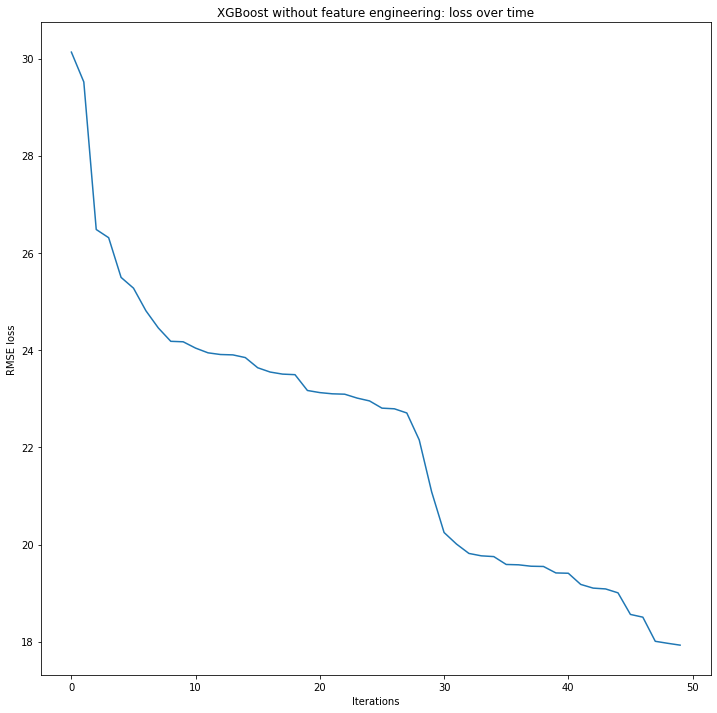

In [6]:
# Plot loss
plt.rcParams["figure.figsize"] = (12, 12)
eval_loss, train_loss = result['eval']['rmse'], result['train']['rmse']
it = list(range(len(eval_loss)))
# plt.plot(it, eval_loss)
plt.plot(it, train_loss)
plt.xlabel('Iterations')
plt.ylabel('RMSE loss')
plt.title('XGBoost without feature engineering: loss over time')
plt.savefig('XGBoost_loss_baseline.png')
plt.show()


mean_absolute_error:  2.5137267


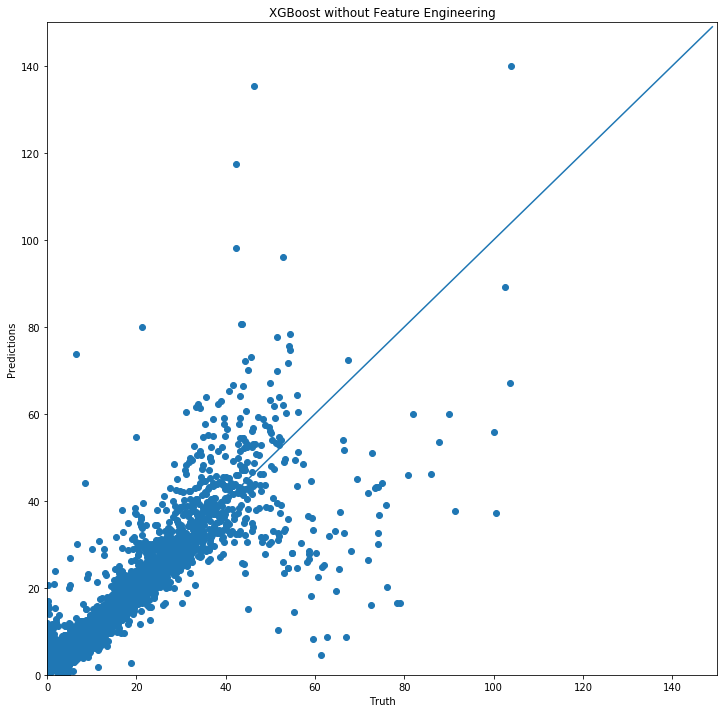

In [7]:
# Test
def Test():
    ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
    ytruth = eval_label
    print(mean_absolute_error, mean_absolute_error(ytruth, ypred))

plt.figure()
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
ytruth = eval_label
print("mean_absolute_error: ", mean_absolute_error(ytruth, ypred))
plt.scatter(ytruth[:10000], ypred[:10000])
plt.xlabel('Truth')
plt.ylabel('Predictions')
r = list(range(150))
plt.plot(r)
plt.xlim((0,150))
plt.ylim((0,150))
plt.title('XGBoost without Feature Engineering')
plt.savefig('XGBoost_Baseline.png')


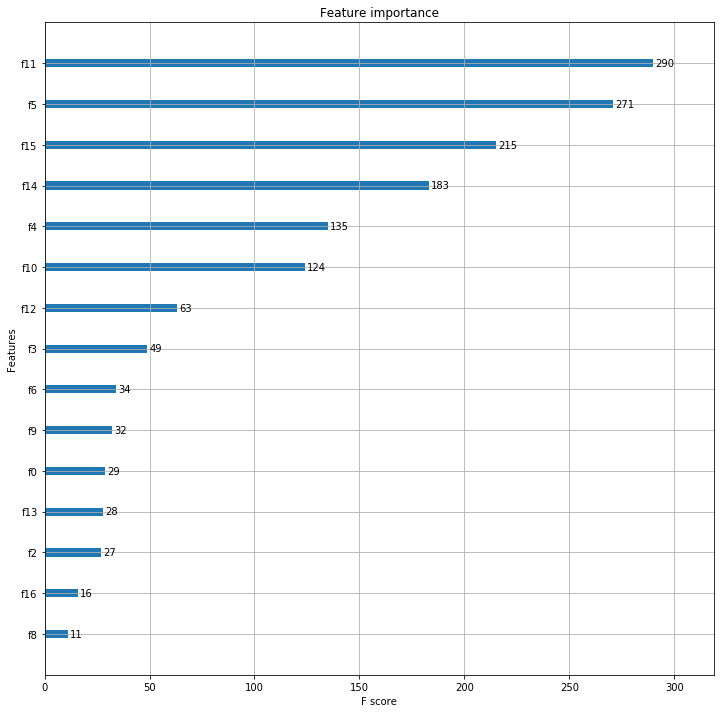

In [8]:
# Plotting
plt.rcParams["figure.figsize"] = (12, 12)
ax = xgb.plot_importance(bst, max_num_features=20)
# xgb.plot_tree(bst, num_trees=2)

In [ ]:
fig = ax.figure
fig.
fig.savefig("XGBoostFeatureRanking.png")